In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/Final_filtered_features.csv", na_values=['NaN ','NULL','NA',' Nan', 'NaaN',' NaN'])

In [3]:
data

,Date,Australia,China,EUR,India,Israel,Malaysia,Mexico,New Zealand,Norway,...,Poland,Qatar,Russia,Saudi Arabia,Singapore,South Africa,Switzerland,Thailand,U.K.,U.S.
0,1/4/16,0.520544,0.110659,0.785392,0.010843,0.184175,0.166688,0.041530,0.489286,0.081409,...,0.183467,0.197988,0.009882,0.192180,0.506341,0.046369,0.721685,0.019929,1.064440,0.720675
1,1/5/16,0.522630,0.111183,0.778943,0.010893,0.184539,0.166924,0.041790,0.489286,0.081241,...,0.180887,0.199140,0.009503,0.193298,0.508786,0.045834,0.717691,0.020065,1.063310,0.724868
2,1/6/16,0.516299,0.110623,0.778616,0.010864,0.183921,0.165885,0.041559,0.485131,0.080916,...,0.180210,0.199130,0.009503,0.193289,0.506380,0.045834,0.718581,0.020014,1.062820,0.724833
3,1/7/16,0.508623,0.109555,0.785075,0.010796,0.183483,0.163655,0.040912,0.479945,0.080956,...,0.180210,0.198454,0.009503,0.192633,0.503045,0.044869,0.722156,0.019900,1.052210,0.722373
4,1/8/16,0.510064,0.109636,0.784564,0.010835,0.184184,0.165283,0.040292,0.478930,0.081042,...,0.180759,0.198453,0.009503,0.192631,0.503849,0.045201,0.722946,0.019936,1.054800,0.722368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,12/17/21,0.512476,0.112212,0.810152,0.009387,0.229551,0.169825,0.034487,0.486091,0.079596,...,0.174906,0.196824,0.009698,0.191050,0.523769,0.045137,0.777566,0.021421,0.950087,0.715050
1481,12/20/21,0.509316,0.112324,0.807641,0.009428,0.227296,0.169531,0.034550,0.482449,0.079247,...,0.173969,0.196824,0.009643,0.191050,0.523903,0.045197,0.775660,0.021391,0.945806,0.716438
1482,12/21/21,0.509225,0.112359,0.808617,0.009471,0.226266,0.169989,0.034477,0.480517,0.079676,...,0.174880,0.196678,0.009698,0.190909,0.524090,0.045170,0.776261,0.021255,0.948326,0.715907
1483,12/22/21,0.510355,0.112259,0.808570,0.009465,0.226062,0.169949,0.034477,0.483525,0.080365,...,0.174577,0.196562,0.009696,0.190796,0.524203,0.045058,0.775299,0.021188,0.952668,0.715485


In [4]:
data[["Date","India","U.S.","China","EUR"]]

,Date,India,U.S.,China,EUR
0,1/4/16,0.010843,0.720675,0.110659,0.785392
1,1/5/16,0.010893,0.724868,0.111183,0.778943
2,1/6/16,0.010864,0.724833,0.110623,0.778616
3,1/7/16,0.010796,0.722373,0.109555,0.785075
4,1/8/16,0.010835,0.722368,0.109636,0.784564
...,...,...,...,...,...
1480,12/17/21,0.009387,0.715050,0.112212,0.810152
1481,12/20/21,0.009428,0.716438,0.112324,0.807641
1482,12/21/21,0.009471,0.715907,0.112359,0.808617
1483,12/22/21,0.009465,0.715485,0.112259,0.808570


In [5]:
data = data.fillna(method='bfill')
data = data.dropna()

In [6]:
df= data

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by quarters and find maximum value for each currency within each quarter
df_quarters = df.groupby(pd.Grouper(key='Date', freq='Q')).max()

# Assign numbers 1, 2, 3, ... n to quarters
df_quarters['Quarter'] = range(1, len(df_quarters) + 1)

/var/folders/6l/kj4wg03n05z3ywmc19ncdxcm0000gn/T/ipykernel_805/167309795.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df_quarters

,Australia,China,EUR,India,Israel,Malaysia,Mexico,New Zealand,Norway,Philippines,...,Qatar,Russia,Saudi Arabia,Singapore,South Africa,Switzerland,Thailand,U.K.,U.S.,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-31,0.544648,0.111183,0.808123,0.010893,0.188480,0.180983,0.041790,0.490694,0.085838,0.015462,...,0.199396,0.010574,0.193547,0.525360,0.048182,0.737867,0.020495,1.064440,0.725801,1
2016-06-30,0.554702,0.109905,0.811280,0.010729,0.188727,0.183885,0.041103,0.513638,0.087624,0.015489,...,0.197409,0.011149,0.191619,0.530117,0.049948,0.742471,0.020335,1.047380,0.718570,2
2016-09-30,0.552025,0.108263,0.806205,0.010764,0.190650,0.181537,0.039728,0.531779,0.088979,0.015457,...,0.198440,0.011438,0.192619,0.534757,0.054026,0.743036,0.020718,0.959307,0.722320,3
2016-12-31,0.559146,0.107898,0.804656,0.011015,0.195488,0.174924,0.039361,0.533792,0.089864,0.015155,...,0.205416,0.012381,0.199390,0.525551,0.054602,0.744650,0.020899,0.939938,0.747714,4
2017-03-31,0.570143,0.108106,0.796502,0.011367,0.204181,0.166897,0.039306,0.538760,0.089404,0.015042,...,0.205541,0.013170,0.199511,0.527259,0.058773,0.742594,0.021393,0.928177,0.748168,5
2017-06-30,0.560287,0.107031,0.820710,0.011473,0.206046,0.170072,0.040554,0.527726,0.086725,0.014854,...,0.203123,0.013179,0.197165,0.528069,0.056948,0.750323,0.021481,0.947793,0.739368,6
2017-09-30,0.572244,0.108396,0.846707,0.011172,0.204925,0.168239,0.040953,0.536115,0.091127,0.014281,...,0.198282,0.012296,0.192466,0.524766,0.055479,0.753175,0.021398,0.953957,0.721747,7
2017-12-31,0.556935,0.107859,0.842126,0.011039,0.203504,0.174243,0.038968,0.511392,0.089604,0.014077,...,0.196197,0.012389,0.190442,0.525479,0.057064,0.730995,0.021765,0.953941,0.714157,8
2018-03-31,0.557308,0.110158,0.856950,0.011084,0.205308,0.178100,0.037579,0.508631,0.089581,0.014108,...,0.193251,0.012377,0.187582,0.528380,0.059537,0.742265,0.022101,0.980128,0.703432,9


In [19]:
df_2020_2021 = df_quarters[-12:-4] # -12,-4
df_2020_2021

,Australia,China,EUR,India,Israel,Malaysia,Mexico,New Zealand,Norway,Philippines,...,Qatar,Russia,Saudi Arabia,Singapore,South Africa,Switzerland,Thailand,U.K.,U.S.,Quarter
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-31,0.520565,0.107320,0.825242,0.010465,0.199701,0.177644,0.037974,0.496602,0.084882,0.013879,...,0.198288,0.011268,0.192471,0.532614,0.053771,0.732667,0.023115,0.952843,0.721768,13
2019-06-30,0.517829,0.107555,0.818882,0.010513,0.203080,0.176738,0.038317,0.491446,0.084860,0.014012,...,0.199574,0.011493,0.193720,0.532427,0.051630,0.737835,0.023412,0.948492,0.726449,14
2019-09-30,0.510690,0.105811,0.817598,0.010575,0.210541,0.176437,0.038284,0.490595,0.084687,0.014354,...,0.201608,0.011525,0.195694,0.533846,0.052247,0.750548,0.023991,0.911929,0.733852,15
2019-12-31,0.505986,0.104242,0.810060,0.010354,0.210541,0.176140,0.038448,0.485311,0.082180,0.014420,...,0.201704,0.011682,0.195787,0.535901,0.051660,0.755452,0.024129,0.967350,0.734203,16
2020-03-31,0.505986,0.105615,0.818428,0.010259,0.214368,0.178667,0.039419,0.484843,0.082181,0.014584,...,0.204123,0.011889,0.198136,0.538114,0.051508,0.771709,0.024005,0.954017,0.743009,17
2020-06-30,0.506645,0.104045,0.820227,0.009755,0.211088,0.170476,0.033631,0.474828,0.078195,0.014637,...,0.202269,0.010632,0.196336,0.521752,0.046066,0.767507,0.023536,0.920854,0.736259,18
2020-09-30,0.520674,0.104597,0.842056,0.009671,0.210326,0.172137,0.033701,0.478955,0.080674,0.014682,...,0.199499,0.010309,0.193647,0.522231,0.043721,0.780882,0.023460,0.946127,0.726178,19
2020-12-31,0.527096,0.107206,0.848977,0.009669,0.215492,0.172214,0.035263,0.494885,0.080730,0.014648,...,0.194879,0.009534,0.189162,0.523857,0.047649,0.785241,0.023320,0.942088,0.709359,20


In [20]:
df_2020_2021 = df_2020_2021[["India",'U.S.',"EUR","China","Quarter"]]
df_2020_2021

,India,U.S.,EUR,China,Quarter
Date,,,,,
2019-03-31,0.010465,0.721768,0.825242,0.107320,13
2019-06-30,0.010513,0.726449,0.818882,0.107555,14
2019-09-30,0.010575,0.733852,0.817598,0.105811,15
2019-12-31,0.010354,0.734203,0.810060,0.104242,16
2020-03-31,0.010259,0.743009,0.818428,0.105615,17
2020-06-30,0.009755,0.736259,0.820227,0.104045,18
2020-09-30,0.009671,0.726178,0.842056,0.104597,19
2020-12-31,0.009669,0.709359,0.848977,0.107206,20


/var/folders/6l/kj4wg03n05z3ywmc19ncdxcm0000gn/T/ipykernel_805/1644710378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_2021['Cluster'] = clusters


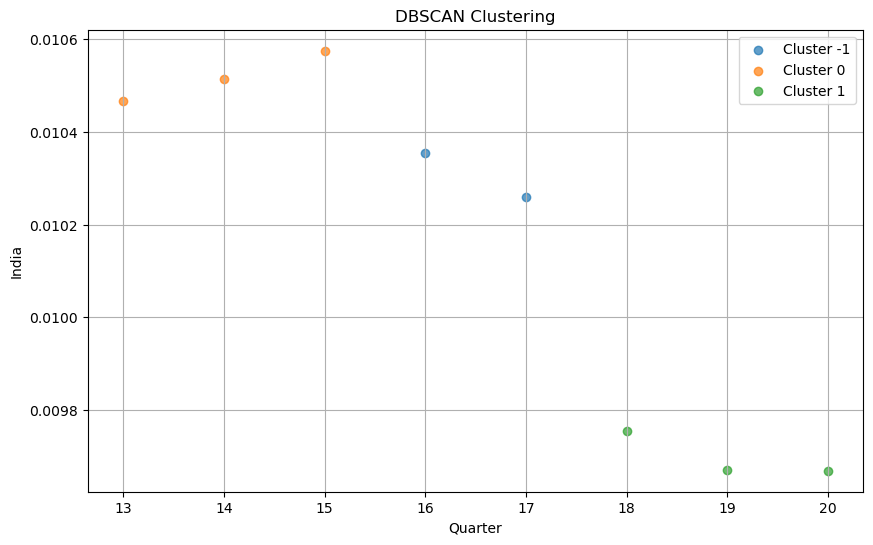

In [21]:
features = ['India','Quarter']#, 'U.S.', 'EUR', 'China']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_2020_2021[features])
dbscan = DBSCAN(eps=0.5, min_samples=2)  # eps to be changed from 0.3 to 0.75
clusters = dbscan.fit_predict(df_scaled)

df_2020_2021['Cluster'] = clusters

plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(df_2020_2021[df_2020_2021['Cluster'] == cluster]['Quarter'], df_2020_2021[df_2020_2021['Cluster'] == cluster]['India'], label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('Quarter')
plt.ylabel('India')
plt.title('DBSCAN Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
events = pd.read_csv("../data/events-cleaned.csv")

In [16]:
events.columns

Index(['Unnamed: 0', 'Year', 'Date', 'Event', 'Country'], dtype='object')

In [17]:
events.loc[events["Year"]==2017]

,Unnamed: 0,Year,Date,Event,Country
69,69,2017,January 20,Donald Trump is inaugurated as President of th...,the United States
70,70,2017,January 21,Millions of people participate in the Women's ...,NIL
71,71,2017,February 13,"Kim Jong-nam, the half-brother of Kim Jong-Un,...",Kuala Lumpur
72,72,2017,May 13,Pope Francis canonizes Jacinta and Francisco M...,Jacinta
73,73,2017,May 22,A terrorist bombing attack at an Ariana Grande...,Manchester
74,74,2017,June 2,36 people are killed in an attack in Resorts W...,NIL
75,75,2017,August 11 – 12,"Charlottesville, Virginia becomes the site of ...",Charlottesville
76,76,2017,September,Two earthquakes strike Mexico on September 8 a...,Mexico
77,77,2017,October 1,60 people are killed in a mass shooting at a m...,Las Vegas
78,78,2017,October 14,"A bombing in Mogadishu, Somalia kills 587 peop...",Mogadishu


In [18]:
events.loc[events["Country"]=="India"]

,Unnamed: 0,Year,Date,Event,Country
91,91,2019,August 5,India revokes the special status of Jammu and ...,India
235,235,2023,August 23,ISRO's Chandrayaan 3 lands on the lunar south ...,India
